## *Statistics coded:* Environmental Economy – statistics on employment and growth

Prepared by [**REZVAN_DERAYATI**](r.derayati@studenti.unipi.it) (EMOS).

This notebook aims at illustrating the *Statistics Expplained* article on [Development of key indicators for the environmental economy and the overall economy, EU-27, 2000–2017](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Environmental_economy_%E2%80%93_statistics_on_employment_and_growth#Development_of_key_indicators_for_the_environmental_economy).


This article presents statistics on employment and growth in the European Union’s (EU’s) environmental economy, as it is defined in the European environmental goods and services sector (EGSS) accounts. The environmental economy encompasses activities and products that serve either of two purposes: ‘environmental protection’ — that is, preventing, reducing and eliminating pollution or any other degradation of the environment or ‘resource management’ — that is, preserving natural resources and safeguarding them against depletion. EGSS accounts provide information on production (output) and export of environmental goods and services and the related employment and gross value added.


### Settings

Put all libraries/packages/modules/etc... that are necessary so that you can run this notebook.

In [1]:
import numpy as np
import pandas as pd
!pip install --user eurostatapiclient
from eurostatapiclient import EurostatAPIClient


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

## General overview

We simply "reproduce" the layout of the article here: the (sub)sections of this notebook shall match the (sub)sections of the article.

In [2]:
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

### Development of key indicators for the environmental economy

In this section, the Development of key indicators for the environmental economy and overall economy are investigated. To do so, we should define the parameters of Employment in enviornmental economy and also overall economy, Gross Value Added in enviornmetal economy and GDP of overall economy for time period of 2007-2017. Then the information from dataset of Eurostat will be retrieved.

In [3]:
#We define params of dataframes
ds = ['env_ac_egss1', 'env_ac_egss2', 'nama_10_gdp', 'nama_10_a10_e']

params = dict.fromkeys(ds, {})
params.update({'env_ac_egss1': {'ceparema': 'TOTAL',
'GEO': 'EU27_2020',
'nace_r2': 'TOTAL',
'na_item': 'EMP_DC',
'sinceTimePeriod': '2000',
'ty': 'TOT_EGSS',
'unit': 'FTE',
'precision': 1},
'env_ac_egss2': {'ceparema': 'TOTAL',
'GEO': 'EU27_2020',
'nace_r2': 'TOTAL',
'na_item': 'B1G',
'sinceTimePeriod': '2000',
'ty': 'TOT_EGSS',
'unit': 'MEUR_CLV10',
'precision': 1},
'nama_10_gdp' : {'GEO': 'EU27_2020',
'na_item': 'B1GQ',
'sinceTimePeriod': '2000',
'unit': 'CLV10_MEUR',
'precision': 1},
'nama_10_a10_e': {'GEO': 'EU27_2020',
'nace_r2': 'TOTAL',
'na_item': 'EMP_DC',
'sinceTimePeriod': '2000',
'unit': 'THS_PER',
'precision': 1}
})

In [4]:
df = dict.fromkeys(ds)
[df.update({ds: client.get_dataset(ds, params = params[ds]).to_dataframe()}) for ds in df.keys()];
lastTimePeriod = 2017
geoPlace = 'EU27_2020'
for ds in df.keys():
    data = df[ds].copy() # actually not necessary
    df[ds] = data[data.time.astype(int) <= lastTimePeriod] 
    df[ds] = data.loc[data['geo' ]== geoPlace]
baseYear = 2000
basevalues, values = dict.fromkeys(ds), dict.fromkeys(ds)
for ds in df.keys():
    data = df[ds].copy()
    basevalues[ds] = data[data.time.astype(int) == baseYear]['values'].squeeze()
    values[ds] = 100 * data['values']/basevalues[ds]

In the following part, the Figure 1 of article is plotted.

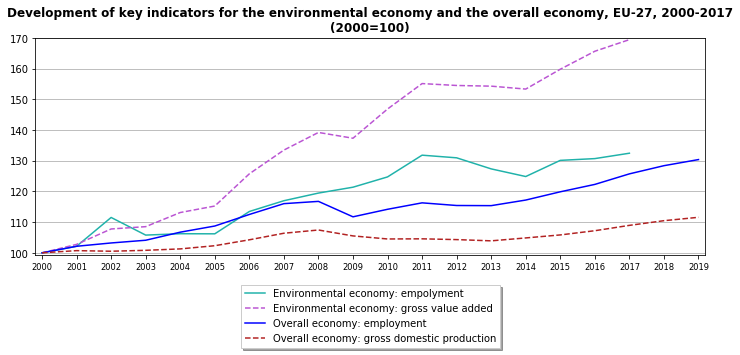

In [5]:
labels = dict.fromkeys(ds, {})
labels.update({'env_ac_egss1': "Environmental economy: empolyment",
'env_ac_egss2': "Environmental economy: gross value added",
'nama_10_gdp' : "Overall economy: employment",
'nama_10_a10_e': "Overall economy: gross domestic production"
})
kw_plot = dict.fromkeys(ds, {})
kw_plot.update({'env_ac_egss1': {'color': 'lightseagreen'},'env_ac_egss2': {'linestyle': 'dashed', 'color':'mediumorchid'},'nama_10_gdp' : {'color': 'blue'},'nama_10_a10_e': {'linestyle': 'dashed', 'color': 'firebrick'}})
fig, ax = plt.subplots()
plt.margins(x = 0.01, y = 0.01)
[ax.plot(df[ds].time, values[ds], label = labels[ds], **kw_plot[ds]) for ds in df.keys()];
ax.yaxis.grid()
plt.title('Development of key indicators for the environmental economy and the overall economy, EU-27, 2000-2017\n(2000=100)', fontweight = 'bold')
plt.legend(loc = 'lower center', fancybox = False, shadow = True,bbox_to_anchor = (0.5, -0.45))
ax.xaxis.set_tick_params(labelsize = 'small')
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1], forward=True)

### Employment by environmental domain

Employment in the environmental economy can be broken down by environmental protection and resource management activities. This two major parts are seprated into three environmental protection activities (wastewater management; waste management; other environmental protection activities) and two resource management activities (water saving; renewable energy and energy efficiency) respectively. First we define the paramethers: 

In [16]:

labels = ['params_df1_pro_water','params_df1_pro_waste','params_df1_pro_other','params_df1_manage_watersaving','params_df1_manage_renewable']

params = dict.fromkeys(labels, {})

params.update({'params_df1_pro_water' :
    {
    'ceparema': 'CEPA2',
    'GEO': 'EU27_2020',
    'nace_r2':'TOTAL',
    'na_item': 'EMP_DC',
    'sinceTimePeriod': '2000',
    'ty': 'TOT_EGSS',
    'unit':'FTE',
    'precision': 1
    },
    'params_df1_pro_waste' :
    {
    'ceparema': 'CEPA3',
    'GEO': 'EU27_2020',
    'nace_r2':'TOTAL',
    'na_item': 'EMP_DC',
    'sinceTimePeriod': '2000',
    'ty': 'TOT_EGSS',
    'unit':'FTE',
    'precision': 1
    },
    'params_df1_pro_other' :
    {
    'ceparema': ('CEPA1','CEPA4','CEPA5','CEPA6','CEPA7','CEPA7-9','CEPA8','CEPA812','CEPA9'),
    'GEO': 'EU27_2020',
    'nace_r2':'TOTAL',
    'na_item': 'EMP_DC',
    'sinceTimePeriod': '2000',
    'ty': 'TOT_EGSS',
    'unit':'FTE',
    'precision': 1
    },
    'params_df1_manage_watersaving' :
    {
    'ceparema': 'CREMA10',
    'GEO': 'EU27_2020',
    'nace_r2':'TOTAL',
    'na_item': 'EMP_DC',
    'sinceTimePeriod': '2000',
    'ty': 'TOT_EGSS',
    'unit':'FTE',
    'precision': 1
    },
    'params_df1_manage_renewable' :
    {
    'ceparema': ('CREMA13A','CREMA13B'),
    'GEO': 'EU27_2020',
    'nace_r2':'TOTAL',
    'na_item': 'EMP_DC',
    'sinceTimePeriod': '2000',
    'ty': 'TOT_EGSS',
    'unit':'FTE',
    'precision': 1
    }
})

Then we fetch and prepare data for years:2000 and 2017. 

In [19]:
# We retrieve the info with the EurostatApiClient

df = dict.fromkeys(labels)

[df.update({ds: client.get_dataset('env_ac_egss1', params = params[ds]).to_dataframe()}) for ds in df.keys()]

[params[lbl].update({'lastTimePeriod': '2017'}) for lbl in params]


[df.update({lbl: df[lbl][df[lbl].time.isin(['2000','2017'])]}) for lbl in df.keys()]


[df.update({lbl: df[lbl].loc[df[lbl]['geo']=='EU27_2020']}) for lbl in df.keys()]



values = dict.fromkeys(labels)
for lbl in labels:
    if lbl in ['params_df1_pro_water', 'params_df1_pro_waste','params_df1_manage_watersaving']:
        values.update({lbl: list(df[lbl]['values']/1000000)})
    else:
        values.update({lbl: (df[lbl][df[lbl].time=='2000'].sum()['values']/1000000,df[lbl][df[lbl].time=='2017'].sum()['values']/1000000)})


In following section, the Figure 2 is plotted.

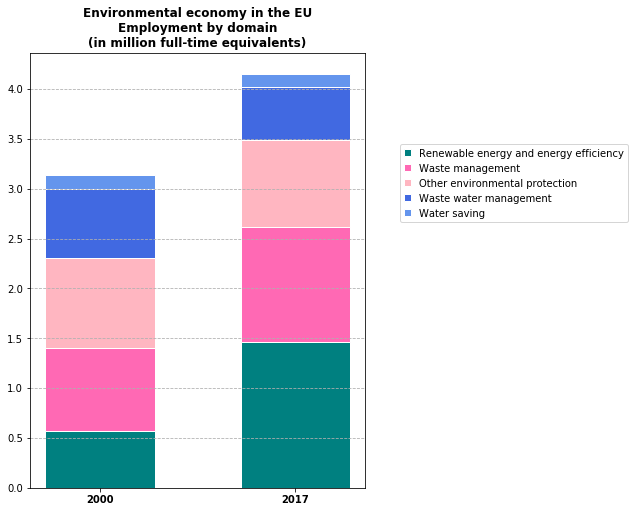

In [21]:
r = [0, 0.05]

plt.figure(figsize=(6, 8))

ax = plt.axes()

# Names of group and bar width
names = ['2000', '2017']
barWidth = 0.028


colors = dict.fromkeys(labels, "")

colors.update({'params_df1_pro_water' : 'royalblue',
                'params_df1_pro_waste': 'hotpink',
                'params_df1_pro_other': 'lightpink',
                'params_df1_manage_watersaving': 'cornflowerblue',
                'params_df1_manage_renewable' : 'teal'
               })


rearranged_labels = ['params_df1_manage_renewable','params_df1_pro_waste','params_df1_pro_other','params_df1_pro_water','params_df1_manage_watersaving']

plotted = []

for lbl in rearranged_labels:
    if lbl == 'params_df1_manage_renewable':
        plt.bar(r, values[lbl],align='center', color=colors[lbl], edgecolor='white', width=barWidth)
        plotted.append(values[lbl])
    else:
        plt.bar(r, values[lbl], align='center', bottom=[sum([item[0] for item in plotted]),sum([item[1] for item in plotted])], color=colors[lbl],
                edgecolor='white', width=barWidth)
        plotted.append(values[lbl])


plt.title('Environmental economy in the EU\nEmployment by domain\n(in million full-time equivalents)',fontweight='bold')

plt.xticks(r, names, fontweight='bold')

ax.yaxis.grid(linestyle='dashed') # horizontal lines

plt.legend(['Renewable energy and energy efficiency','Waste management', 'Other environmental protection', 'Waste water management','Water saving']
           ,loc='center right',bbox_to_anchor=(1.8, 0.7), handlelength=0.7)



# Show graphic
plt.show()

### Employment, production and value added in the environmental economy

The environmental economy can also be analysed with a view on production units. To do so, the employment, Output and Gross Value Added in different sectors: Agriculture, forestry and fishing; Mining, quarrying and manufacturing; Energy and water supply, sewerage and waste services; Construction; Services and Total are defined.

In [23]:
labels = ['params_df1_employment','params_df1_output', 'params_df1_GVA']

params = dict.fromkeys(labels, {})

params.update({'params_df1_employment' :
    {
        'ceparema': 'TOTAL',
        'GEO': 'EU27_2020',
        'nace_r2':('A','B_C','D_E','F','G-U','TOTAL'),
        'na_item': 'EMP_DC',
        'time':'2017',
        'ty': 'TOT_EGSS',
        'unit':'FTE',
        'precision': 1
    },
    'params_df1_output' :
    {
        'ceparema': 'TOTAL',
        'GEO': 'EU27_2020',
        'nace_r2':('A','B_C','D_E','F','G-U','TOTAL'),
        'na_item': 'P1',
        'time':'2017',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    },
    'params_df1_GVA' :
    {
        'ceparema': 'TOTAL',
        'GEO': 'EU27_2020',
        'nace_r2':('A','B_C','D_E','F','G-U','TOTAL'),
        'na_item': 'B1G',
        'time':'2017',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    }
})



preparing data for plotting

In [26]:
# We retrieve the info with the EurostatApiClient
df = dict.fromkeys(labels)

[df.update({ds: client.get_dataset('env_ac_egss3', params = params[ds]).to_dataframe()}) for ds in df.keys()]


[df.update({lbl: df[lbl].loc[df[lbl]['geo']=='EU27_2020']}) for lbl in df.keys()]



values = dict.fromkeys(labels)

[values.update({lbl: df[lbl]['values']}) for lbl in df.keys() ];


Then, I will plot table 1 of article.

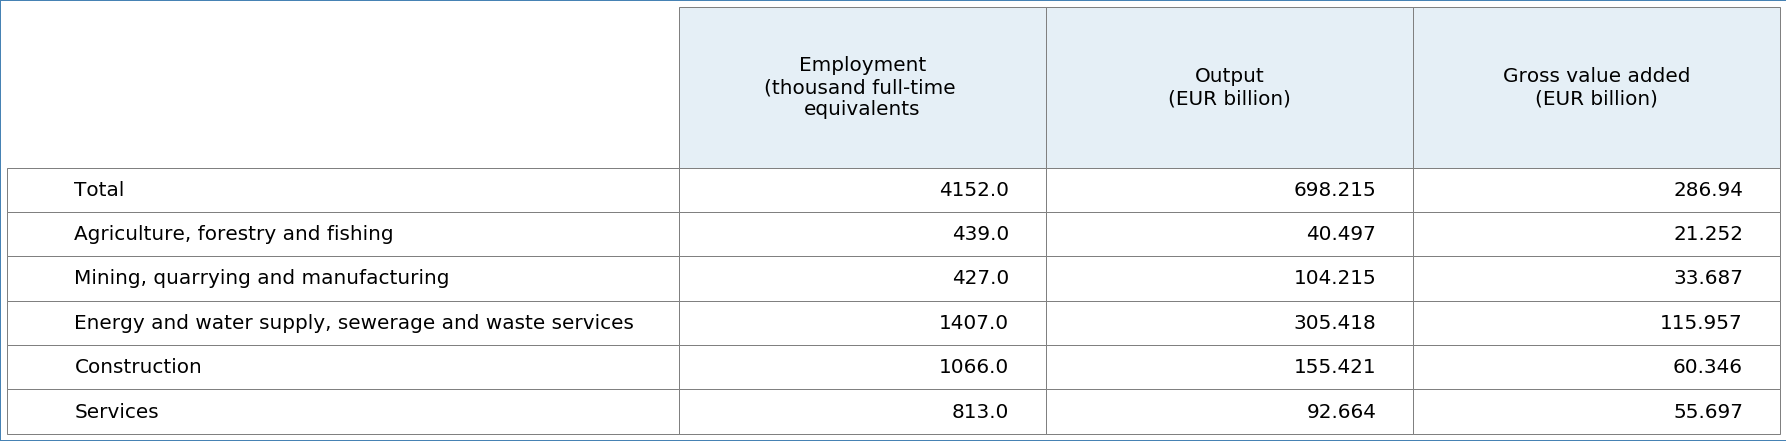

In [25]:
data = pd.concat([values[lbl]/1000 for lbl in values],axis=1,ignore_index=True)

cell_text = data.apply(np.roll, shift=1)  # in data variable the TOTAL values appear in the last row,
# we need to shift it to first row to represent exact table in the paper
row_labels = ['Total', 'Agriculture, forestry and fishing', 'Mining, quarrying and manufacturing',
              'Energy and water supply, sewerage and waste services', 'Construction', 'Services']
col_labels = ['Employment\n(thousand full-time \nequivalents', 'Output\n(EUR billion)',
              'Gross value added\n(EUR billion)']

fig_border = 'steelblue'

fig = plt.figure(linewidth=2,
                 edgecolor=fig_border,
                 tight_layout={'pad': 1})
ax = fig.add_subplot(111)

ccolors = plt.cm.BuPu(np.full(len(col_labels), 0.1))
plt.axis("off")

table = plt.table(cell_text.values,
                  colWidths=[1] * 3,
                  rowLabels=row_labels, colLabels=col_labels, loc="center", colColours=ccolors)

table.set_fontsize(20)

cellDict = table.get_celld()
for i in range(0, len(col_labels)):
    cellDict[(0, i)].set_height(.2)

for key, cell in cellDict.items():
    cell.set_edgecolor('grey')

table.scale(1.5, 3)
plt.show()

### Gross value added of the environmental economy, 2017

 To have a better understanding of labor productivity in different production units, after defining the paramethers of gross value added in different sectors in 2017, the pie chart of Gross value added of enviornmental economy by activity is plotted - as it is demonstrated in article in Figure 3.

In [12]:
params_df1_GVA = {
    'ceparema': 'TOTAL',
    'GEO': 'EU27_2020',
    'nace_r2':('A','B_C','D_E','F','G-U'),
    'na_item': 'B1G',
    'time':'2017',
    #'sinceTimePeriod': '2000',
    'ty': 'TOT_EGSS',
    'unit':'MIO_EUR',
    'precision': 1
}

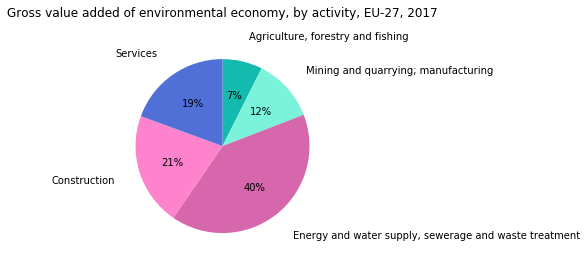

In [13]:
dataframe_1 = client.get_dataset('env_ac_egss3', params=params_df1_GVA).to_dataframe()
dataframe_1 = dataframe_1.loc[dataframe_1['geo']=='EU27_2020']
labels=['Agriculture, forestry and fishing','Mining and quarrying; manufacturing ','Energy and water supply, sewerage and waste treatment','Construction','Services']
plt.pie(dataframe_1['values'], startangle=90,counterclock=False, labels=labels,autopct='%1.0f%%',colors=['#13bbaf','#7bf2da','#d767ad','#fe83cc','#5170d7'], labeldistance=1.3)
plt.title('Gross value added of environmental economy, by activity, EU-27, 2017\n')
plt.show()

### Evolution of gross value added of the environmental economy

In this section, the evolution of GVA of environmental economy in time period of 2000 till 2017 in aformentioned sections, i.e. Waste management, Wastewater management, Other environmental protection, Renewable energy and energy efficiency and finally Water saving is analysed. 

Firstly, the paramethers are defined, then information from database is retrieved:

In [27]:
labels = ['params_df1_pro_water','params_df1_pro_waste', 'params_df1_pro_other','params_df1_manage_watersaving','params_df1_manage_renewable']

params = dict.fromkeys(labels, {})

params.update({'params_df1_pro_water' :
    {
        'ceparema': 'CEPA2',
        'GEO': 'EU27_2020',
        'nace_r2':'TOTAL',
        'na_item': 'B1G',
        'sinceTimePeriod': '2000',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    },
    'params_df1_pro_waste' :
    {
        'ceparema': 'CEPA3',
        'GEO': 'EU27_2020',
        'nace_r2':'TOTAL',
        'na_item': 'B1G',
        'sinceTimePeriod': '2000',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    },
    'params_df1_pro_other' :
    {
        'ceparema': ('CEPA1','CEPA4','CEPA5','CEPA6','CEPA7','CEPA7-9','CEPA8','CEPA812','CEPA9'),
        'GEO': 'EU27_2020',
        'nace_r2':'TOTAL',
        'na_item': 'B1G',
        'sinceTimePeriod': '2000',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    },
    'params_df1_manage_watersaving':
    {
        'ceparema': 'CREMA10',
        'GEO': 'EU27_2020',
        'nace_r2':'TOTAL',
        'na_item': 'B1G',
        'sinceTimePeriod': '2000',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    },
    'params_df1_manage_renewable':
    {
        'ceparema': ('CREMA13A','CREMA13B'),
        'GEO': 'EU27_2020',
        'nace_r2':'TOTAL',
        'na_item': 'B1G',
        'sinceTimePeriod': '2000',
        'ty': 'TOT_EGSS',
        'unit':'MIO_EUR',
        'precision': 1
    }
})



In [28]:
# We retrieve the info with the EurostatApiClient
df = dict.fromkeys(labels)

[df.update({ds: client.get_dataset('env_ac_egss2', params = params[ds]).to_dataframe()}) for ds in df.keys()]


[params[lbl].update({'lastTimePeriod': '2017'}) for lbl in params]


[df.update({lbl: df[lbl][df[lbl].time <= params[lbl]['lastTimePeriod']]}) for lbl in df.keys()]

[df.update({lbl: df[lbl].loc[df[lbl]['geo']=='EU27_2020']}) for lbl in df.keys()]


values = dict.fromkeys(labels)
labels = ['params_df1_pro_water','params_df1_pro_waste', 'params_df1_pro_other','params_df1_manage_watersaving','params_df1_manage_renewable']

for lbl in labels:
    if lbl in ['params_df1_pro_water', 'params_df1_pro_waste','params_df1_manage_watersaving']:
        values.update({lbl: list(df[lbl]['values']/1000)})
    else:
        values.update({lbl: list(df[lbl].groupby(['time'])['values'].sum()/1000)})


In following part, the last figure of article, Figure 4, is plotted.

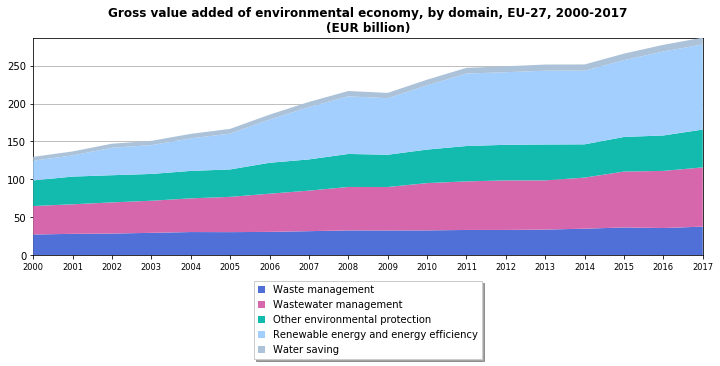

In [30]:
def swapPositions(list, pos1, pos2):
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(labelsize='small')

plt.margins(x=0,y=0)


ax.yaxis.grid(zorder=0)


F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1])

plt_labels=['Waste management','Wastewater management','Other environmental protection','Renewable energy and energy efficiency','Water saving']
plt.stackplot(df['params_df1_pro_water'].time ,tuple(swapPositions(list(values.values()),-1,-2)),labels=plt_labels,colors=['#5170d7','#d767ad','#13bbaf','#a2cffe','#acc2d9'],zorder=3)
plt.title('Gross value added of environmental economy, by domain, EU-27, 2000-2017\n(EUR billion)',fontweight='bold')
plt.legend(loc='lower center',fancybox=False, shadow=True,bbox_to_anchor=(0.5, -0.5),handlelength=0.7)

plt.show()

